In [184]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [185]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assignment_3(Linear%20Regression)/kc_house_data.csv")

In [186]:
# the number of rows and columns
df.shape

(21613, 21)

In [187]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [189]:
df_copy= df

In [190]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [191]:
# convert to datetime
df['date'] = pd.to_datetime(df['date'])

# Count the values with .5 in 'bathrooms' column
bathrooms_count = df[df['bathrooms'] % 1 == 0.5].shape[0]

# Count the values with .5 in 'floors' column
floors_count = df[df['floors'] % 1 == 0.5].shape[0]

# Print the counts
print("Count of values with .5 in 'bathrooms':", bathrooms_count)
print("Count of values with .5 in 'floors':", floors_count)

Count of values with .5 in 'bathrooms': 7674
Count of values with .5 in 'floors': 2079


The count provided above indicates a considerable quantity of bathrooms and floors with a decimal value of 0.5. Therefore, I will maintain these values without making any changes.

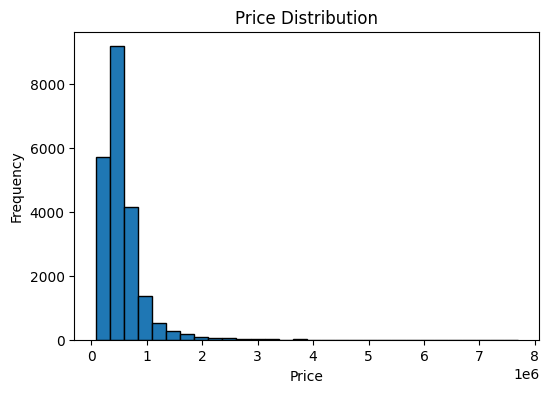

In [192]:
# Plotting the histogram of the price column
plt.figure(figsize=(6, 4))
plt.hist(df['price'], bins=30, edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

Bedrooms

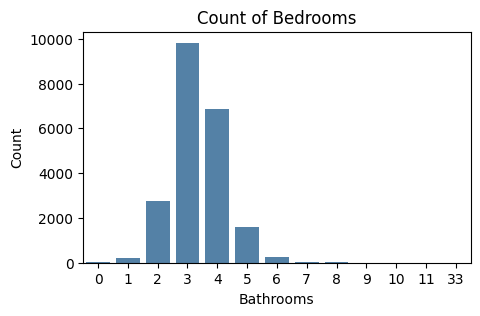

In [193]:
bedroom_counts = df['bedrooms'].value_counts()

# Create a bar plot of bathroom counts
plt.figure(figsize=(5, 3))
sns.barplot(x=bedroom_counts.index, y=bedroom_counts.values, color='steelblue')

# Set plot title and labels
plt.title('Count of Bedrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Count')

# Show plot
plt.show()

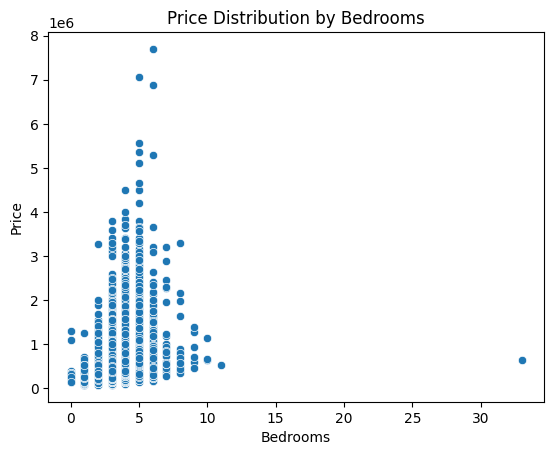

In [194]:
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

In [195]:
df[(df['bedrooms'] >= 10)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8757,1773100755,2014-08-21,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,2014-08-14,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
15161,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914
15870,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
19254,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745


In [196]:
df_copy= df[(df['zipcode'] == 98103)]
df_copy.groupby('zipcode')[['bedrooms','price', 'sqft_living','grade']].median()

,bedrooms,price,sqft_living,grade
zipcode,,,,
98103,3.0,550000.0,1505.0,7.0


Typically, the number of bedrooms in this area is three. It is evident that there is not a substantial difference in house prices between properties with 33 bedrooms and other houses in the same area. This suggests that there may be an error in the data entry.

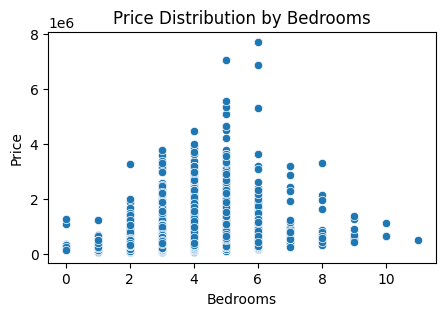

In [197]:
df = df.drop(df[df['bedrooms'] == 33].index)
plt.figure(figsize=(5, 3))
sns.scatterplot(data = df,x='bedrooms', y='price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bedrooms')

plt.show()

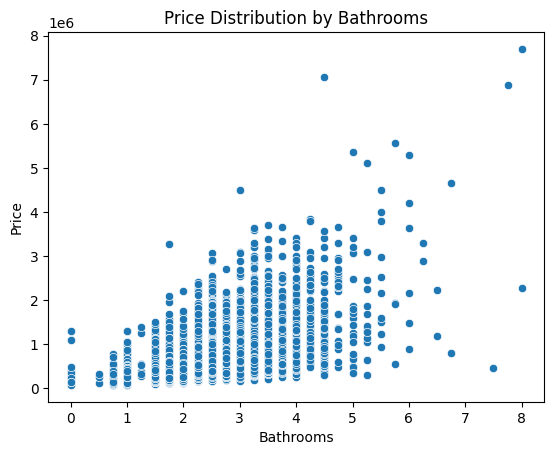

In [198]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

In [199]:
df[(df['bathrooms'] >= 7)]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
8546,424049043,2014-08-11,450000.0,9,7.50,4050,6504,2.0,0,0,...,7,4050,0,1996,0,98144,47.5923,-122.301,1448,3866
9254,9208900037,2014-09-19,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
12777,1225069038,2014-05-05,2280000.0,7,8.00,13540,307752,3.0,0,4,...,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


In [200]:
df = df.drop(df[df['bathrooms'] >= 7].index)

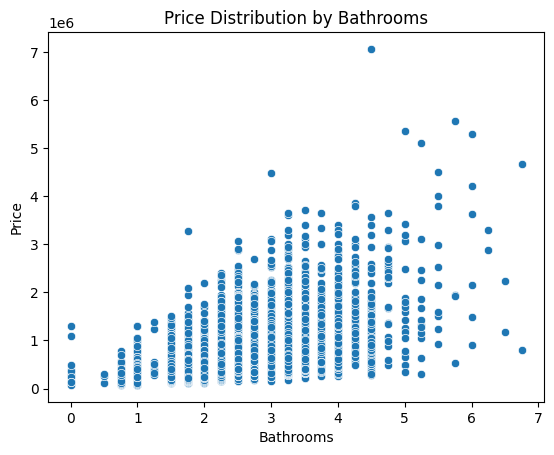

In [201]:
# Create a box plot
sns.scatterplot(data = df,x='bathrooms', y='price')
# Set labels and title
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.title('Price Distribution by Bathrooms')

# Display the plot
plt.show()

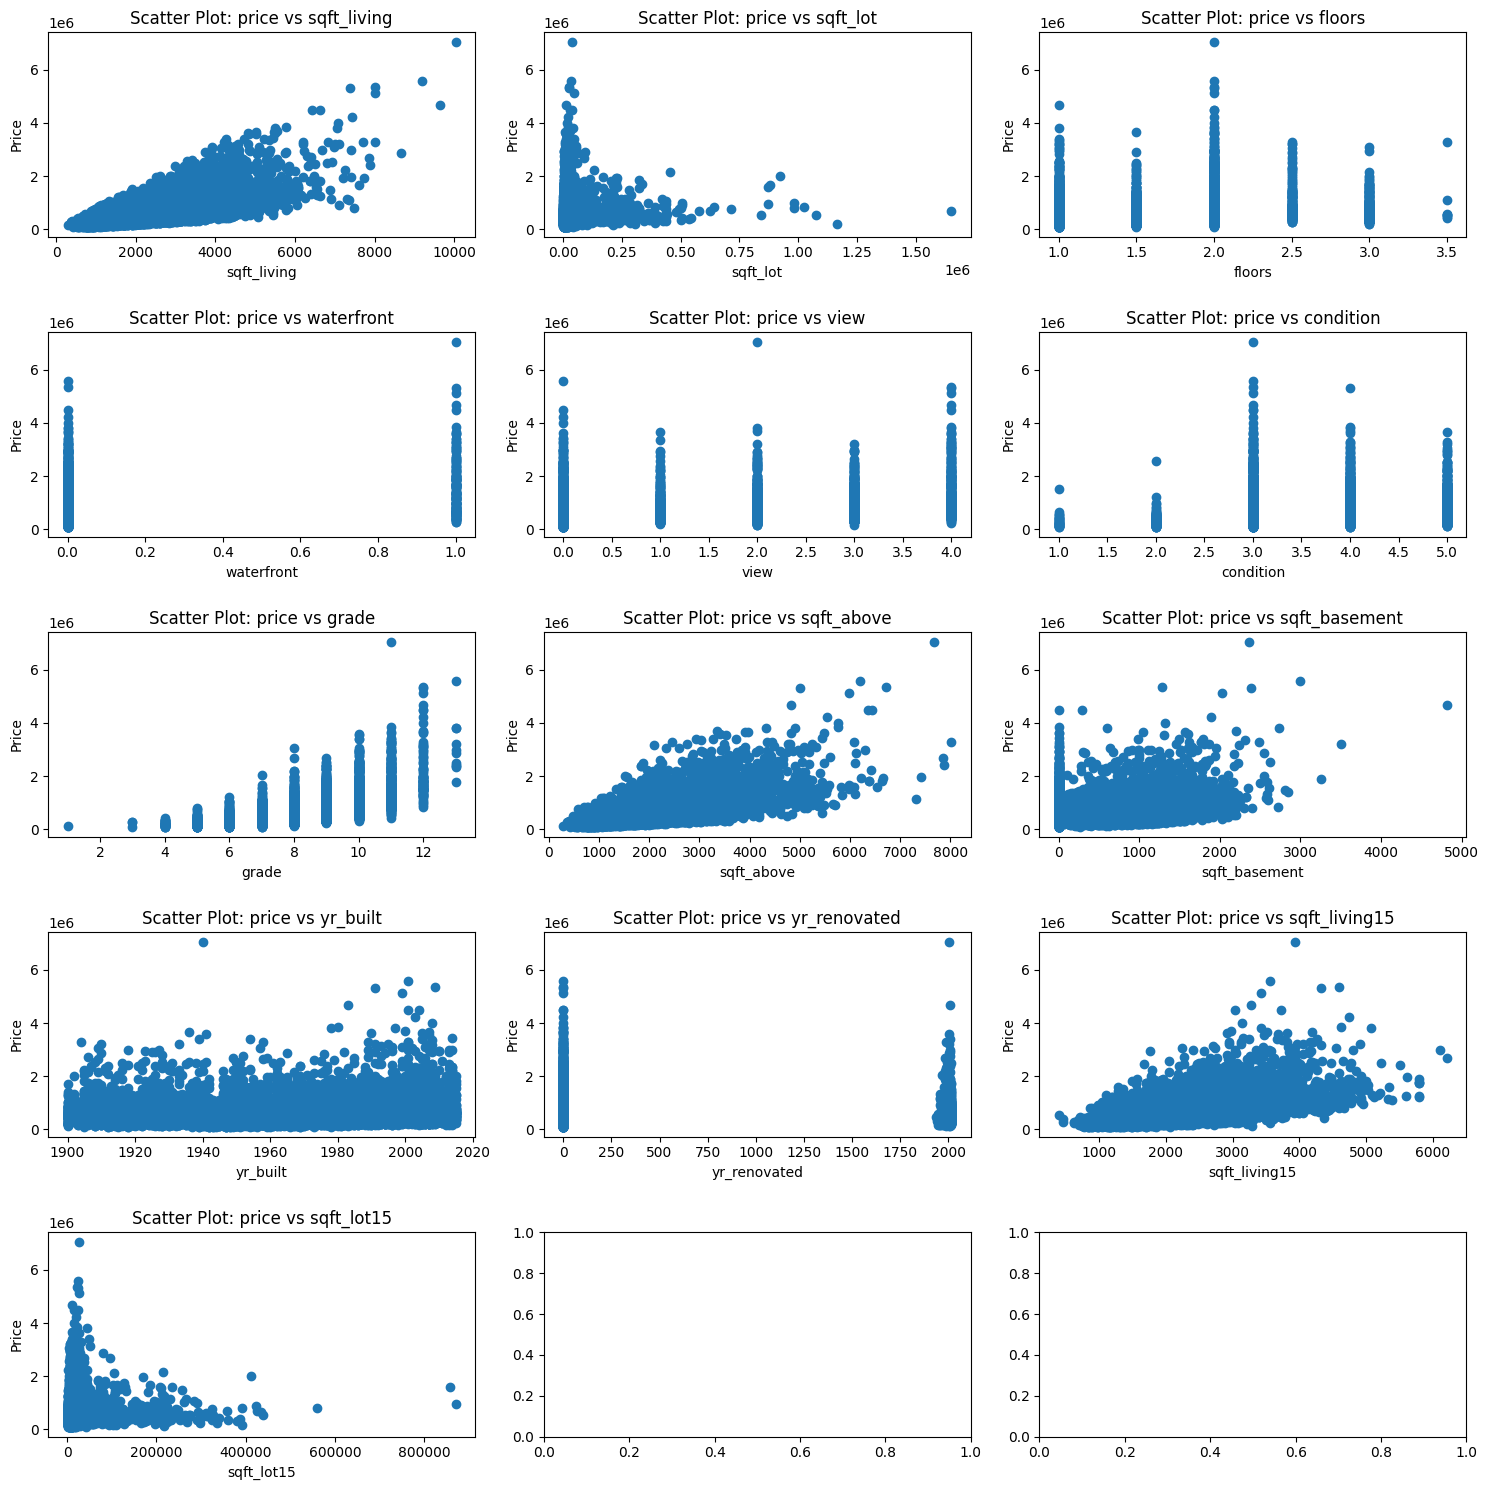

In [202]:
def plot_scatter(df, column, ax):
    ax.scatter(df[column], df['price'])
    ax.set_title(f"Scatter Plot: price vs {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Price")

columns = ['sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
           'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated','sqft_living15', 'sqft_lot15']

num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])

plt.tight_layout()

plt.show()


<Figure size 200x100 with 0 Axes>

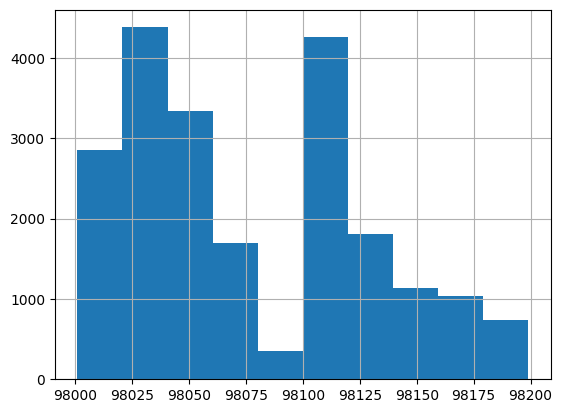

<Figure size 200x100 with 0 Axes>

In [203]:
df["zipcode"].hist()
plt.figure(figsize=(2,1))

<Axes: xlabel='lat', ylabel='long'>

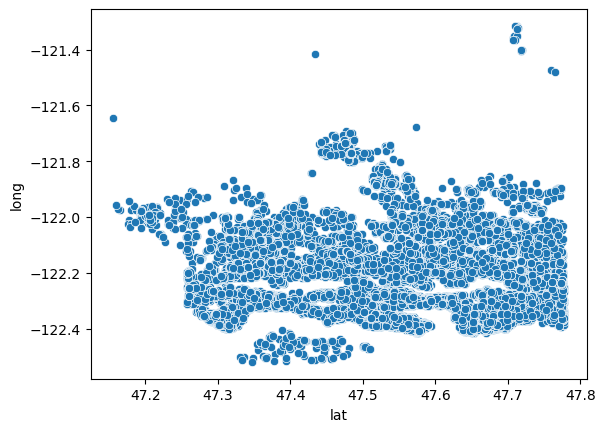

In [204]:
sns.scatterplot(data = df, x = "lat", y = "long")

The overall data appears to follow a normal distribution. To remove outliers from specific columns, we can utilize the z-score method.

In [205]:
def remove_outliers(df):
    variables = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15']
    
    for variable in variables:
        df = df[np.abs(df[variable]-df[variable].mean()) <= (3*df[variable].std())]
        
    return df

In [206]:
# Apply function to df
df = remove_outliers(df)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19772 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19772 non-null  int64         
 1   date           19772 non-null  datetime64[ns]
 2   price          19772 non-null  float64       
 3   bedrooms       19772 non-null  int64         
 4   bathrooms      19772 non-null  float64       
 5   sqft_living    19772 non-null  int64         
 6   sqft_lot       19772 non-null  int64         
 7   floors         19772 non-null  float64       
 8   waterfront     19772 non-null  int64         
 9   view           19772 non-null  int64         
 10  condition      19772 non-null  int64         
 11  grade          19772 non-null  int64         
 12  sqft_above     19772 non-null  int64         
 13  sqft_basement  19772 non-null  int64         
 14  yr_built       19772 non-null  int64         
 15  yr_renovated   19772 non

In [208]:
((21608-19772)/21608)*100

8.496853017400962

8.5 % of data

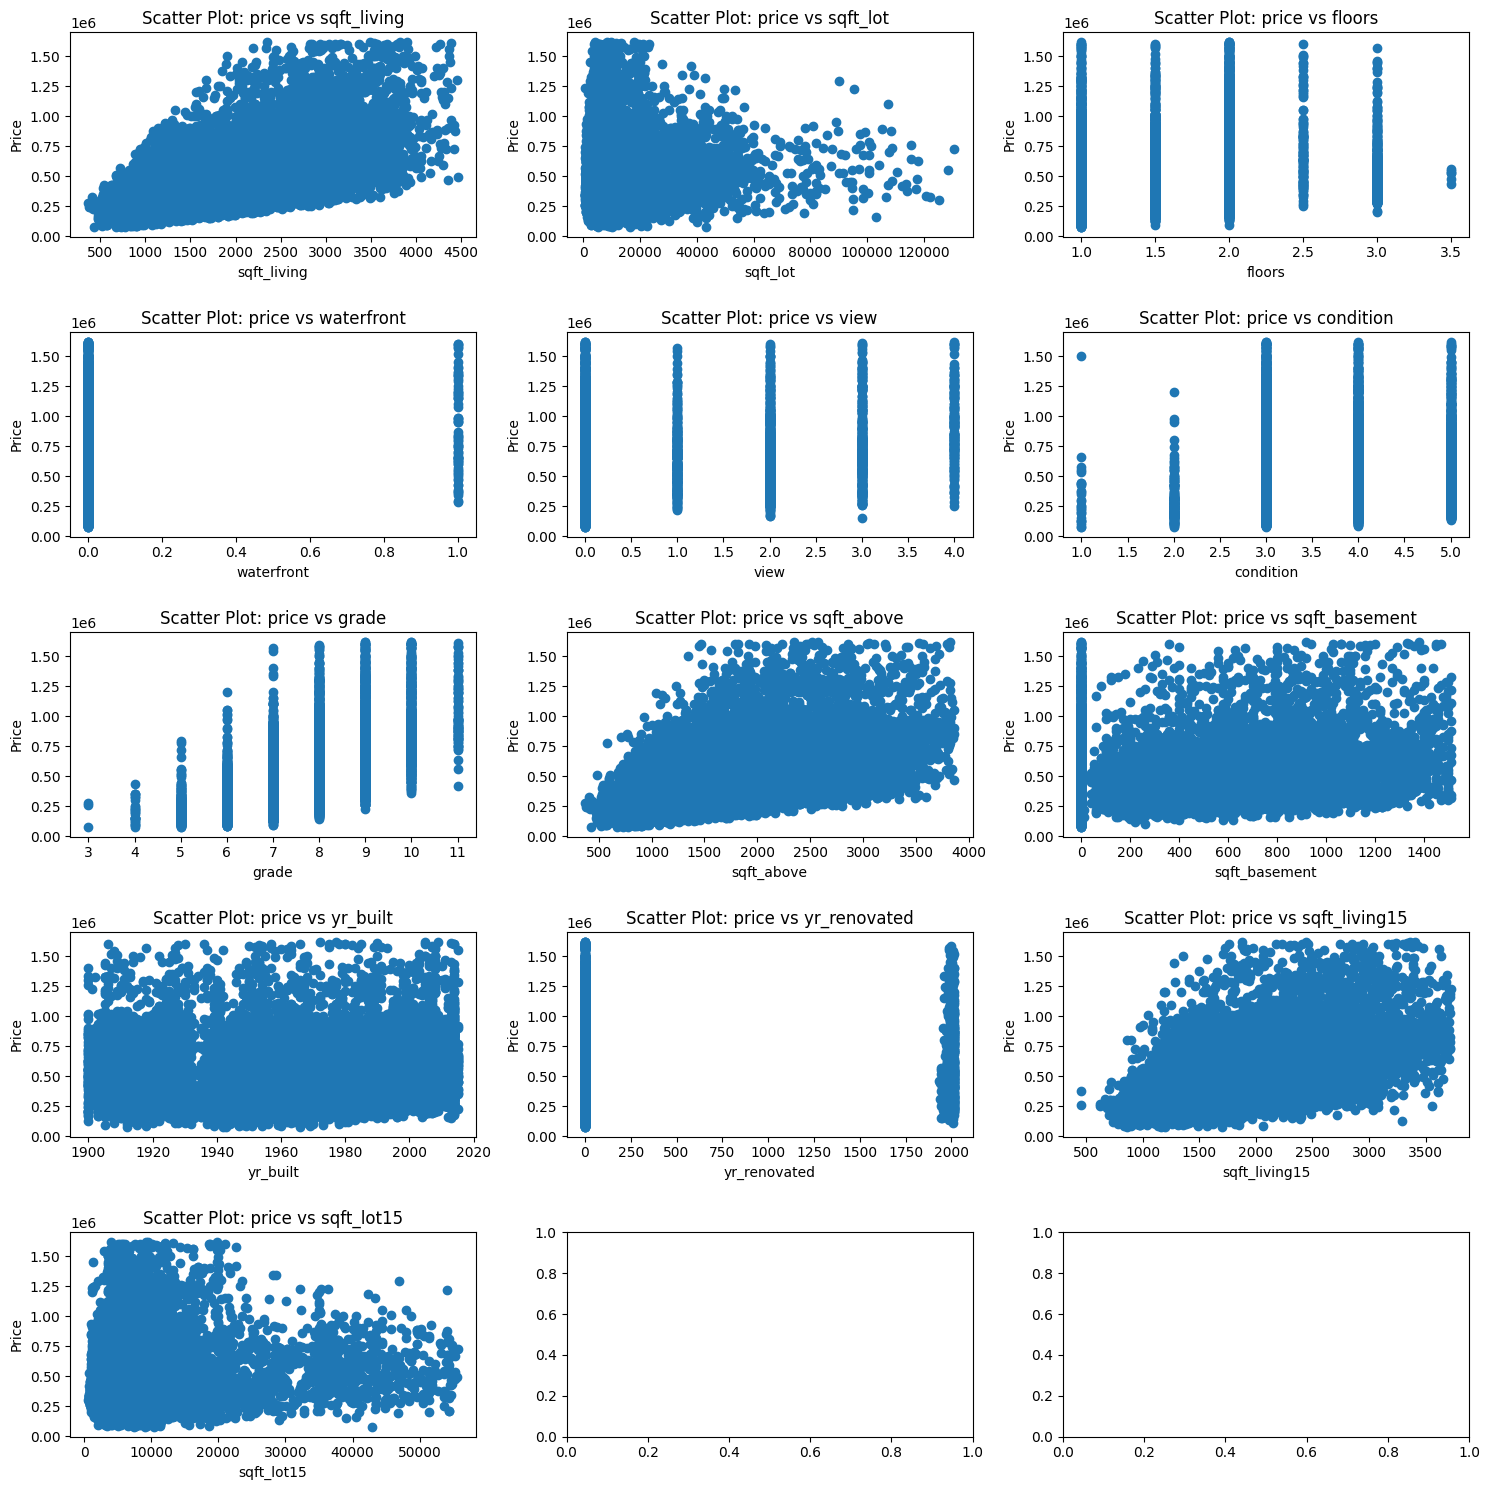

In [209]:
num_cols = 3
num_rows = (len(columns) - 1) // num_cols + 1

fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))

for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols
    plot_scatter(df, column, axs[row, col])

plt.tight_layout()

plt.show()

In [210]:
df[(df['sqft_basement'] <= 7)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


New Variables.

In [211]:
df['price_per_sqft'] = df.groupby('zipcode')['price'].transform(lambda x: x / df['sqft_living'])
df['month'] = df['date'].dt.month
df['Year'] = df['date'].dt.year
df['house_age'] = (df['Year'] - df['yr_built'])

In [212]:
def Floor_cat(x):
    if x >= 0 and x < 2:
        return 1
    elif x >= 2 and x < 3:
        return 2
    elif x >= 3 and x < 4:
        return 3
    else:
        return 'Missing'

In [213]:
# Create function to classify amounts
def grade_cat(x):
    if x <= 3:
        return 1
    elif x >= 4 and x <=6:
        return 2
    elif x >= 7 and x < 10:
        return 3
    elif x >= 10:
        return 4
    else:
        return 'Missing'

In [214]:
df['Floor_category'] = df['floors'].apply(Floor_cat)

In [215]:
df['grade_category'] = df['grade'].apply(grade_cat)

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19772 entries, 0 to 21612
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              19772 non-null  int64         
 1   date            19772 non-null  datetime64[ns]
 2   price           19772 non-null  float64       
 3   bedrooms        19772 non-null  int64         
 4   bathrooms       19772 non-null  float64       
 5   sqft_living     19772 non-null  int64         
 6   sqft_lot        19772 non-null  int64         
 7   floors          19772 non-null  float64       
 8   waterfront      19772 non-null  int64         
 9   view            19772 non-null  int64         
 10  condition       19772 non-null  int64         
 11  grade           19772 non-null  int64         
 12  sqft_above      19772 non-null  int64         
 13  sqft_basement   19772 non-null  int64         
 14  yr_built        19772 non-null  int64         
 15  yr_reno

In [217]:
df_corr= df

In [218]:
df_corr.drop(columns=['date','id'], inplace=True)

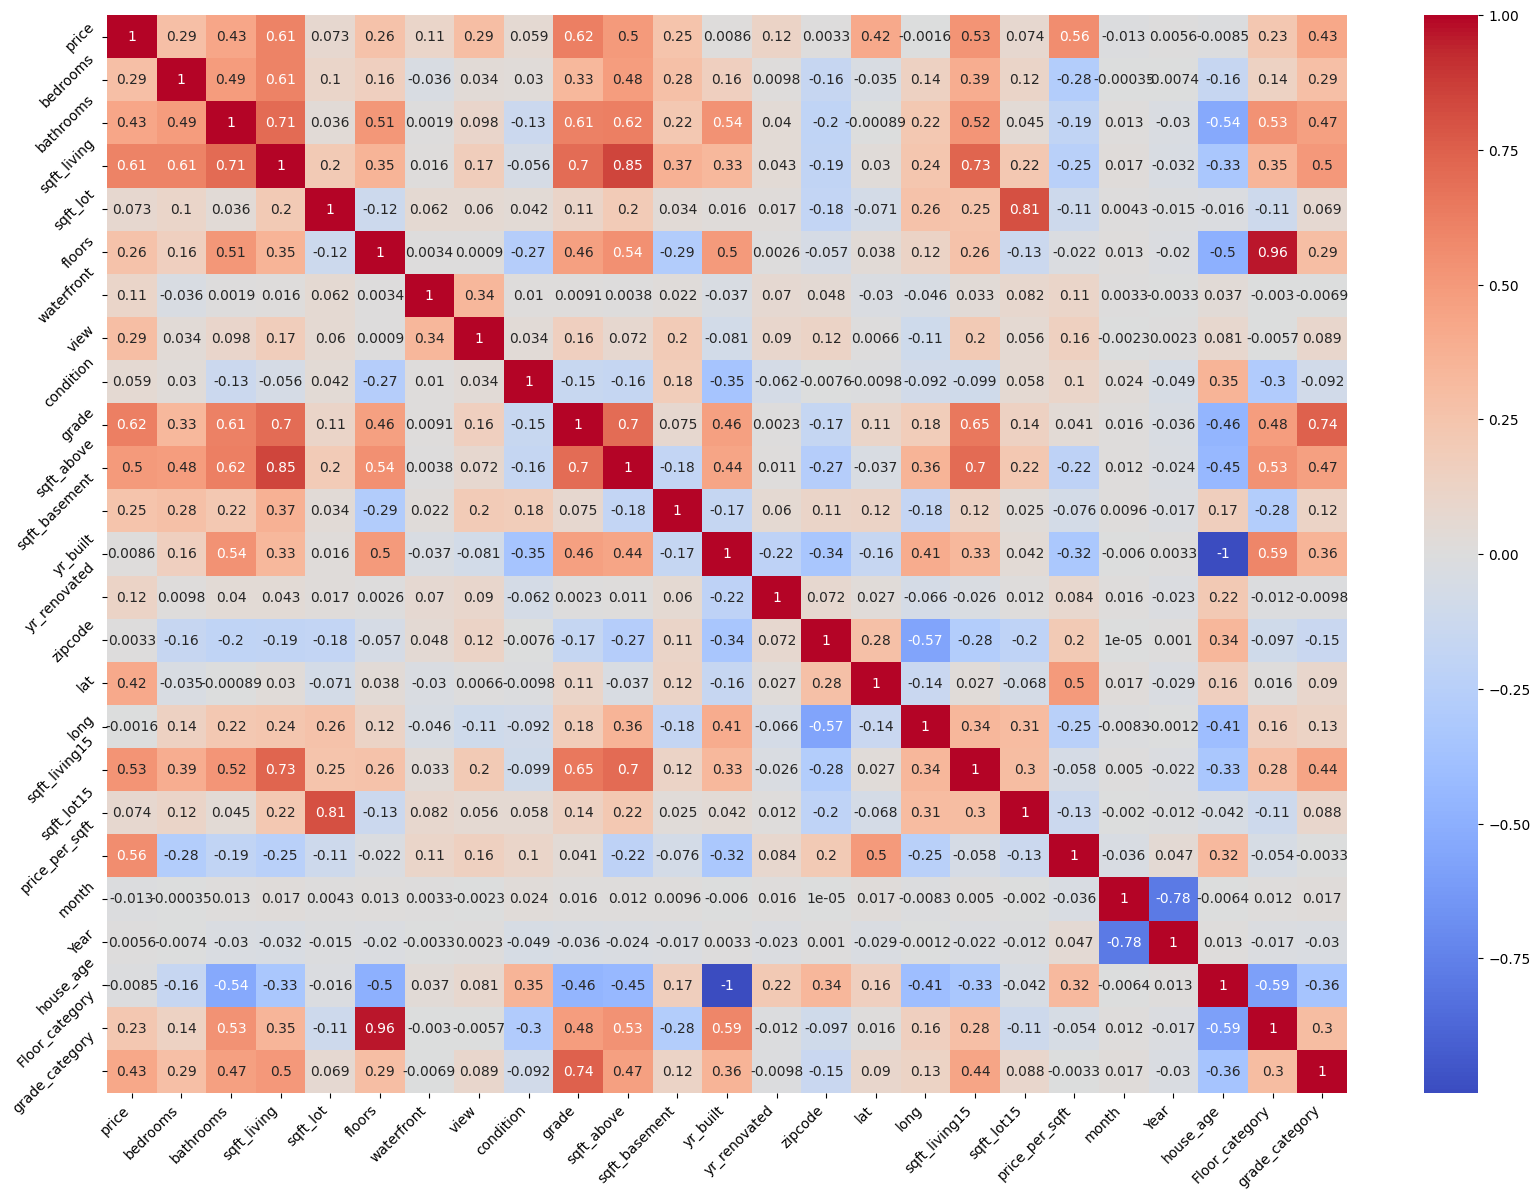

In [219]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(20, 14))  # Adjust the figsize according to your preference

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate x_tick labels
ax.set_yticklabels(ax.get_yticklabels(), rotation=45, ha='right')  # Rotate y_tick labels

plt.show()

In [220]:
'''
columns = df.columns.values

# Set the number of rows and columns for the subplots grid
num_rows = (len(columns) - 1) // 3 + 1
num_cols = 3

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
fig.tight_layout()

# Iterate over the columns and create scatter plots with a line of best fit
for i, column in enumerate(columns):
    ax = axes[i // num_cols, i % num_cols]  # Select the appropriate subplot
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel(column)

plt.show()

'''

'\ncolumns = df.columns.values\n\n# Set the number of rows and columns for the subplots grid\nnum_rows = (len(columns) - 1) // 3 + 1\nnum_cols = 3\n\n# Create the subplots grid\nfig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))\nfig.tight_layout()\n\n# Iterate over the columns and create scatter plots with a line of best fit\nfor i, column in enumerate(columns):\n    ax = axes[i // num_cols, i % num_cols]  # Select the appropriate subplot\n    sns.boxplot(data=df, y=column, ax=ax)\n    ax.set_xlabel(column)\n    ax.set_ylabel(column)\n\nplt.show()\n\n'

In [221]:
results = ols("price ~ bedrooms+ bathrooms + sqft_living +floors+view+grade+sqft_above+sqft_basement+lat+sqft_living15+price_per_sqft+grade_category+Floor_category", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.650e+04
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:45:26   Log-Likelihood:            -2.4907e+05
No. Observations:               19772   AIC:                         4.982e+05
Df Residuals:                   19759   BIC:                         4.983e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -3.125e+06   2.08e+05    -15.

In [222]:
Y = df.iloc[:, df.columns.get_loc('price')]

X = df.iloc[:, df.columns != 'price']

In [223]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1234)

In [224]:
y_pred = results.predict(X_test)

In [225]:
np.sqrt(mean_squared_error(y_pred,y_test))

70996.72786281079

Linear Reg

In [226]:
categorical_features = ['floors','waterfront', 'view','condition', 'grade','grade_category','Floor_category']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement','yr_built','yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15','price_per_sqft','month','Year','house_age']
target = 'price' 

In [227]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [228]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [229]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [230]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [231]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'grade_category',
                                                   'Floor_category']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_per_sqft', 'month',
                                                   'Year', 'house_age'])])),
                ('regressor', LinearRegression())])

In [232]:
pred_lr = linear_regression.predict(X_test)

In [233]:
np.sqrt(mean_squared_error(pred_lr,y_test))

69678.11936960214

Ridge Reg

In [234]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [235]:
ridge_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'grade_category',
                                                   'Floor_category']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_per_sqft', 'month',
                                                   'Year', 'house_age'])])),
                ('regressor', Ridge(alpha=3.0))])

In [236]:
pred_ridge = ridge_regression.predict(X_test)


In [237]:
np.sqrt(mean_squared_error(pred_ridge,y_test))


69421.39205073105

Lasso Reg

In [238]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [239]:
lasso_regression.fit(X_train, y_train)


c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.382e+12, tolerance: 7.825e+10
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'grade_category',
                                                   'Floor_category']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_per_sqft', 'month',
                                                   'Year', 'house_age'])])),
                ('regressor', Lasso())])

In [240]:
lasso_pred = lasso_regression.predict(X_test)

In [241]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

69485.8779809845

Elastic Net

In [242]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [243]:
elasticnet_regression.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['floors', 'waterfront',
                                                   'view', 'condition', 'grade',
                                                   'grade_category',
                                                   'Floor_category']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'sqft_above',
                                                   'sqft_basement', 'yr_built',
                                                   'yr_renovated', 'zipcode',
                                                   'lat', 'long',
                                                   'sqft_living15',
                                                   'sqft_lot15',
                                                   'price_per_sqft', 'month',
                                                   'Year', 'house_age'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [244]:
elasticnet_pred = elasticnet_regression.predict(X_test)


In [245]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))


81722.9722094303